Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

import cv2

In [ ]:
## If you are using the data by mounting the google drive, use the following :
##from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
#Train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,shuffle = True,seed = 123,image_size=(img_height,img_width),subset = 'training',validation_split =0.2)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
#validation dataset here
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test,batch_size=batch_size,shuffle = True,seed = 123,image_size=(img_height,img_width),subset = 'validation',validation_split=0.2)

Found 118 files belonging to 9 classes.
Using 23 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
from glob import glob

glob('/content/drive/MyDrive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/*')

['/content/drive/MyDrive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis',
 '/content/drive/MyDrive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis',
 '/content/drive/MyDrive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma',
 '/content/drive/MyDrive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis',
 '/content/drive/MyDrive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma',
 '/content/drive/MyDrive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma',
 '/content/drive/MyDrive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular 

In [ ]:
type(class_names)

list


#### to visualize one instance of all the nine classes present in the dataset

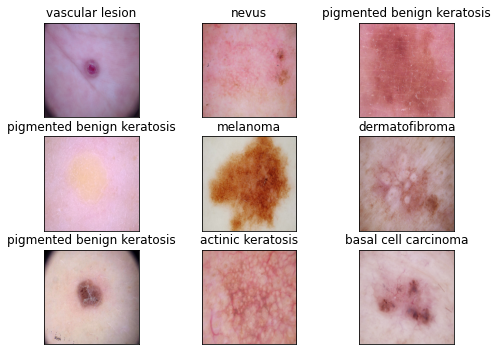

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
num_classes = len(class_names)
plt.figure(figsize=(8,8))
for images,labels in train_ds.take(1):
    for i in range(num_classes):
        ax = plt.subplot(4,3,1+i,xticks=[], yticks=[])
        ax.set_title(class_names[labels[i]])
        plt.imshow(images[i].numpy().astype("int32"))

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(buffer size = 1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:

### Your code goes here
num_classes = 9

model = Sequential([layers.experimental.preprocessing.Rescaling(scale = 1./255,input_shape=(img_height, img_width, 3))])
# first conv layer
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))

# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected

# softmax layer
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# summary of the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 176, 176, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 88, 88, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 495616)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               63438976  
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 1

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#train_ds = train_ds.astype('float32')
#val_ds = val_ds.astype('float32')

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 176, 176, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 88, 88, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 495616)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               63438976  
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 1

### Train the model

In [ ]:

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 492s 384ms/step - loss: 3.9593 - accuracy: 0.3136 - val_loss: 2.7535 - val_accuracy: 0.0870
Epoch 2/20
56/56 [==============================] - 9s 160ms/step - loss: 1.5713 - accuracy: 0.4481 - val_loss: 2.5194 - val_accuracy: 0.2609
Epoch 3/20
56/56 [==============================] - 9s 159ms/step - loss: 1.3776 - accuracy: 0.5201 - val_loss: 3.3186 - val_accuracy: 0.2174
Epoch 4/20
56/56 [==============================] - 9s 161ms/step - loss: 1.1841 - accuracy: 0.5865 - val_loss: 3.4224 - val_accuracy: 0.2174
Epoch 5/20
56/56 [==============================] - 9s 159ms/step - loss: 0.9841 - accuracy: 0.6562 - val_loss: 3.9726 - val_accuracy: 0.2174
Epoch 6/20
56/56 [==============================] - 9s 160ms/step - loss: 0.8510 - accuracy: 0.7310 - val_loss: 3.2379 - val_accuracy: 0.2609
Epoch 7/20
56/56 [==============================] - 9s 160ms/step - loss: 0.7583 - accuracy: 0.7506 - val_loss: 3.7628 - val_accuracy: 0.2174
Epoc

### Visualizing training results

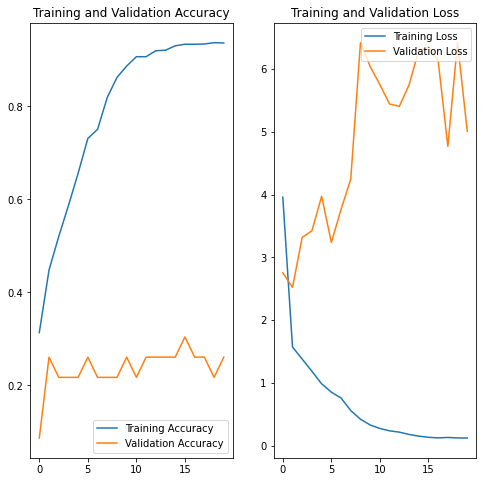

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings

###We have training acc = 93 % and val accu = 26 % .We can see that there is huge gap between training accuracy and validation accuracy which is clearly as case of over fitting.similarily the case of loss.This is logical per say our dataset. Practically, cancer pateients are normally too low as compared to normal scenario and hence that is the case. To solve this overfittig issue, we will go with data augumenation strategy.

In [ ]:
# analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
augmentaion = keras.Sequential(
    [layers.experimental.preprocessing.RandomFlip('horizontal',input_shape = (img_height,img_width,3)),
     layers.experimental.preprocessing.RandomRotation(0.1),
     layers.experimental.preprocessing.RandomZoom(0.1),
     ]
)

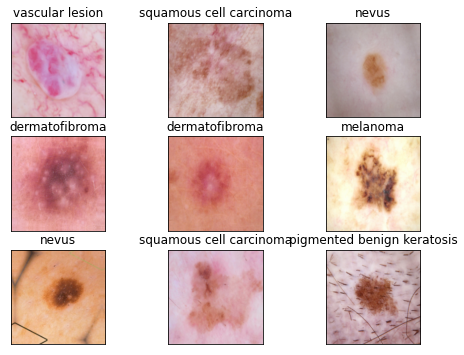

In [ ]:
# visualize how augmentation strategy works for one instance of training image.
import matplotlib.pyplot as plt

num_classes = len(class_names)
plt.figure(figsize=(8,8))
for images,labels in train_ds.take(1):
    for i in range(num_classes):
        aug_image = augmentaion(images)
        ax = plt.subplot(4,3,1+i,xticks=[], yticks=[])
        ax.set_title(class_names[labels[i]])
        plt.imshow(aug_image[i].numpy().astype("int32"))

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential([
                    augmentaion,
                    layers.experimental.preprocessing.Rescaling(scale = 1./255),
                    layers.Conv2D(16,3,padding = 'same',activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Dropout(0.2),
                    layers.Flatten(),
                    layers.Dense(128, activation = 'relu'),
                    layers.Dense(num_classes)
                    ])



### Compiling the model

In [ ]:
## Your code goes here
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 4s 50ms/step - loss: 12.8209 - accuracy: 0.1914 - val_loss: 15.4173 - val_accuracy: 0.0435
Epoch 2/20
56/56 [==============================] - 2s 43ms/step - loss: 12.9520 - accuracy: 0.1964 - val_loss: 15.4173 - val_accuracy: 0.0435
Epoch 3/20
56/56 [==============================] - 2s 43ms/step - loss: 12.9520 - accuracy: 0.1964 - val_loss: 15.4173 - val_accuracy: 0.0435
Epoch 4/20
56/56 [==============================] - 2s 43ms/step - loss: 12.9520 - accuracy: 0.1964 - val_loss: 15.4173 - val_accuracy: 0.0435
Epoch 5/20
56/56 [==============================] - 2s 43ms/step - loss: 12.9520 - accuracy: 0.1964 - val_loss: 15.4173 - val_accuracy: 0.0435
Epoch 6/20
56/56 [==============================] - 2s 43ms/step - loss: 12.9520 - accuracy: 0.1964 - val_loss: 15.4173 - val_accuracy: 0.0435
Epoch 7/20
56/56 [==============================] - 2s 43ms/step - loss: 12.9520 - accuracy: 0.1964 - val_loss: 15.4173 - val_accuracy: 0.0435

### Visualizing the results

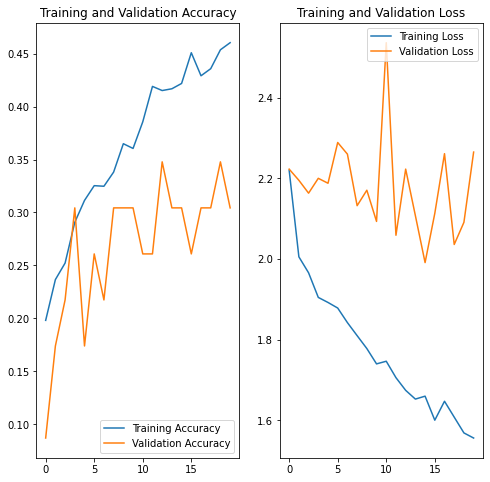

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### 
Findings : We can see there is improvement after data augumentation and using some dropouts to deal with overfitting.Here training accuracy and validation accuracy looks not promising though the Gap between training and validation is now reduced.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [ ]:
## Your code goes here.
for i in class_names:
  print(i)
  paths = pathlib.Path("content//drive//MyDrive//Colab Notebooks//CNN Assignment//Skin cancer ISIC The International Skin Imaging Collaboration//Train"+i)
  print(len(list((paths.glob('*/*.jpg')))))

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="/content/drive/MyDrive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F491BC13090>: 100%|██████████| 500/500 [00:20<00:00, 24.66 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F491756EB10>: 100%|██████████| 500/500 [00:20<00:00, 24.01 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F491BC22810>: 100%|██████████| 500/500 [00:22<00:00, 22.67 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F491BCFE2D0>: 100%|██████████| 500/500 [01:39<00:00,  5.04 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7F491BCB7B50>: 100%|██████████| 500/500 [01:34<00:00,  5.31 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F491753D850>: 100%|██████████| 500/500 [00:20<00:00, 24.11 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F491C02CA10>: 100%|██████████| 500/500 [00:48<00:00, 10.30 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F491BCCCA10>: 100%|██████████| 500/500 [00:21<00:00, 22.82 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F491BCDAC10>: 100%|██████████| 500/500 [00:22<00:00, 22.59 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/drive/MyDrive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025856.jpg_e244e6da-ee28-4a34-ac22-5afecff18954.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025937.jpg_e80f3271-11ae-4830-9cba-e50f5fa03cb6.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027139.jpg_899a06de-c47e-42c1-9891-34a9ba896a73.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027202.jpg_ef711ab5-9d8a-4693-b0b3-bb0

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmen

In [ ]:
dataframe_dict_new = dict(zip(path_list,lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])


In [ ]:
df2['Label'].value_counts()

pigmented benign keratosis    500
seborrheic keratosis          500
melanoma                      500
dermatofibroma                500
actinic keratosis             500
nevus                         500
squamous cell carcinoma       500
vascular lesion               500
basal cell carcinoma          500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train="/content/drive/MyDrive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',  
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here
model = Sequential([
                    augmentaion,
                    layers.experimental.preprocessing.Rescaling(scale = 1./255),
                    layers.Conv2D(16,3,padding = 'same',activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    #layers.add(BatchNormalization()),  # Batch normalization
                    layers.MaxPooling2D(),
                    layers.Dropout(0.2),
                    layers.Flatten(),
                    layers.Dense(128, activation = 'relu'),
                    layers.Dense(num_classes)
                    ])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_6 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 45, 45, 64)       

#### **Todo:**  Train your model

In [ ]:
epochs = 30
## Your code goes here, use 50 epochs.
history = history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 44s 245ms/step - loss: 1.9044 - accuracy: 0.2795 - val_loss: 1.5926 - val_accuracy: 0.4150
Epoch 2/30
169/169 [==============================] - 37s 213ms/step - loss: 1.4847 - accuracy: 0.4299 - val_loss: 1.6077 - val_accuracy: 0.3749
Epoch 3/30
169/169 [==============================] - 39s 221ms/step - loss: 1.3948 - accuracy: 0.4646 - val_loss: 1.3583 - val_accuracy: 0.4766
Epoch 4/30
169/169 [==============================] - 39s 222ms/step - loss: 1.3450 - accuracy: 0.4918 - val_loss: 1.3312 - val_accuracy: 0.4848
Epoch 5/30
169/169 [==============================] - 38s 218ms/step - loss: 1.2474 - accuracy: 0.5278 - val_loss: 1.2798 - val_accuracy: 0.5041
Epoch 6/30
169/169 [==============================] - 38s 221ms/step - loss: 1.2461 - accuracy: 0.5195 - val_loss: 1.2221 - val_accuracy: 0.5241
Epoch 7/30
169/169 [==============================] - 38s 220ms/step - loss: 1.1998 - accuracy: 0.5376 - val_loss: 1.1733 - val_ac

#### **Todo:**  Visualize the model results

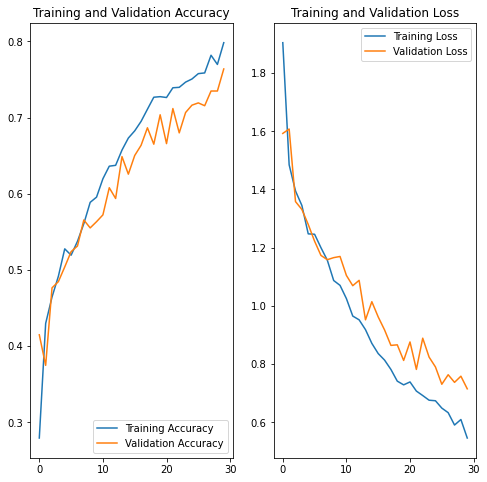

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?
### Here we have good training and validation accuracy post using  drop outs,augumentation. Model does not seems to have overfit or underfit.however, other techniniques of regularization or more hyperparamerts need to tuned for better model performace.
               ^

